Building the dashboard using the 3-D approach: Determine, Design, and Develop

### 1. Data Preparation

In [392]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import statistics
import plotly.graph_objects as go

In [25]:
data = pd.read_csv('customer_churn_data.csv',low_memory=False)

In [26]:
data.head()

,month,account_no,tenure,effective_start_date,effective_end_date,contract_month,bill_amount,bandwidth,term_reason_code,term_reason_description,complaint_cnt,with_phone_service,current_month_churn,is_new_customer_account
0,202112,93910412CNZO000065449,72,12/28/2017,12/27/2019,24.0,862.2900,275M,DSAT,Dissatisfied with service,0,False,True,0
1,202007,94074838CNZO000067822,49,6/24/2018,6/23/2020,24.0,6433.8300,25M,DSAT,Dissatisfied with service,0,True,True,0
2,202007,73069668CNZO000011157,160,7/1/2018,6/30/2020,24.0,699.6600,25M,DSAT,Dissatisfied with service,0,False,True,0
3,202009,93856268CPRL000077652,25,9/3/2018,8/2/2020,23.0,2930.2416,25M,DSAT,Dissatisfied with service,0,True,True,0
4,202008,76820802CNZO000026425,119,8/22/2018,8/21/2020,24.0,418.8600,1000M,DSAT,Dissatisfied with service,1,False,True,0


### 2. Data Preprocessing

- Transfer the month and year to the right format

In [27]:
data['year'] = data['month'].astype(str).apply(lambda x: datetime.datetime.strptime(x, '%Y%m').year)
data['month'] = data['month'].astype(str).apply(lambda x: datetime.datetime.strptime(x, '%Y%m').month)

In [28]:
data.head()

,month,account_no,tenure,effective_start_date,effective_end_date,contract_month,bill_amount,bandwidth,term_reason_code,term_reason_description,complaint_cnt,with_phone_service,current_month_churn,is_new_customer_account,year
0,12,93910412CNZO000065449,72,12/28/2017,12/27/2019,24.0,862.2900,275M,DSAT,Dissatisfied with service,0,False,True,0,2021
1,7,94074838CNZO000067822,49,6/24/2018,6/23/2020,24.0,6433.8300,25M,DSAT,Dissatisfied with service,0,True,True,0,2020
2,7,73069668CNZO000011157,160,7/1/2018,6/30/2020,24.0,699.6600,25M,DSAT,Dissatisfied with service,0,False,True,0,2020
3,9,93856268CPRL000077652,25,9/3/2018,8/2/2020,23.0,2930.2416,25M,DSAT,Dissatisfied with service,0,True,True,0,2020
4,8,76820802CNZO000026425,119,8/22/2018,8/21/2020,24.0,418.8600,1000M,DSAT,Dissatisfied with service,1,False,True,0,2020


- Checking the information of the dataset

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510125 entries, 0 to 510124
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   month                    510125 non-null  int64  
 1   account_no               510125 non-null  object 
 2   tenure                   510125 non-null  int64  
 3   effective_start_date     508188 non-null  object 
 4   effective_end_date       508188 non-null  object 
 5   contract_month           508188 non-null  float64
 6   bill_amount              510125 non-null  float64
 7   bandwidth                510125 non-null  object 
 8   term_reason_code         5522 non-null    object 
 9   term_reason_description  5522 non-null    object 
 10  complaint_cnt            510125 non-null  int64  
 11  with_phone_service       510125 non-null  bool   
 12  current_month_churn      510125 non-null  bool   
 13  is_new_customer_account  510125 non-null  int64  
 14  year

- Checking the null - NaN values

In [30]:
data.isnull().sum()

month                           0
account_no                      0
tenure                          0
effective_start_date         1937
effective_end_date           1937
contract_month               1937
bill_amount                     0
bandwidth                       0
term_reason_code           504603
term_reason_description    504603
complaint_cnt                   0
with_phone_service              0
current_month_churn             0
is_new_customer_account         0
year                            0
dtype: int64

In [31]:
#data[data['term_reason_code'].isnull()]
#data[data['account_no']== '94578580CNZO000086120'].sort_values(['year','month'])

- The term_reason_code and term_reason_description are customer leave without any reason -> we can filter the NaN with the 'No'.

In [32]:
data['term_reason_code'].fillna('No', inplace=True)
data['term_reason_description'].fillna('No', inplace=True)

In [33]:
data.dropna(inplace = True)

- Check the null - NaN Values

In [34]:
data.isnull().sum()
#or using 'data.isna().any()'

month                      0
account_no                 0
tenure                     0
effective_start_date       0
effective_end_date         0
contract_month             0
bill_amount                0
bandwidth                  0
term_reason_code           0
term_reason_description    0
complaint_cnt              0
with_phone_service         0
current_month_churn        0
is_new_customer_account    0
year                       0
dtype: int64

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 508188 entries, 0 to 508191
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   month                    508188 non-null  int64  
 1   account_no               508188 non-null  object 
 2   tenure                   508188 non-null  int64  
 3   effective_start_date     508188 non-null  object 
 4   effective_end_date       508188 non-null  object 
 5   contract_month           508188 non-null  float64
 6   bill_amount              508188 non-null  float64
 7   bandwidth                508188 non-null  object 
 8   term_reason_code         508188 non-null  object 
 9   term_reason_description  508188 non-null  object 
 10  complaint_cnt            508188 non-null  int64  
 11  with_phone_service       508188 non-null  bool   
 12  current_month_churn      508188 non-null  bool   
 13  is_new_customer_account  508188 non-null  int64  
 14  year     

- The data now is cleaned without any NaN values.

### 3. Exploratory Data Analyst

a. Number of customers

In [99]:
data['account_no'].nunique()# There are number of customers

27405

In [36]:
data['year'].unique().min()#starting year

2020

In [37]:
data['year'].unique().max()#ending year

2022

In [38]:
#starting month of the last year in the dataset
data['month'][data['year'] == data['year'].unique().min()].min()

7

In [39]:
#end month of the last year in the dataset
data['month'][data['year'] == data['year'].unique().max()].max()

6

 ---> Following the data, the dataset starts from July, 2020 to June, 2022

### Reason that customers leaves

<AxesSubplot: ylabel='term_reason_description'>

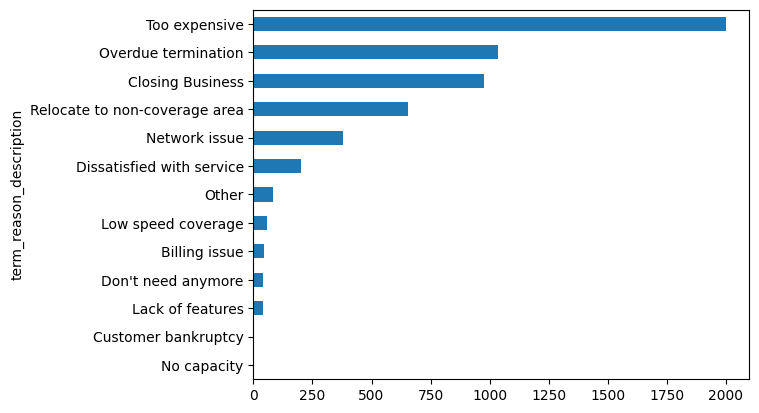

In [46]:
data['term_reason_description'].value_counts().iloc[1:].sort_values(ascending=True).plot.barh()#the first value is No -> So we do not consider in this case

In [41]:
value_counts = data['term_reason_description'].value_counts().iloc[1:]
percentages = round((value_counts / value_counts.sum()) * 100,2)
percentages

term_reason_description
Too expensive                    36.25
Overdue termination              18.74
Closing Business                 17.71
Relocate to non-coverage area    11.87
Network issue                     6.87
Dissatisfied with service         3.66
Other                             1.49
Low speed coverage                1.05
Billing issue                     0.80
Don't need anymore                0.76
Lack of features                  0.74
Customer bankruptcy               0.05
No capacity                       0.02
Name: count, dtype: float64

- From this we can see that the most popular reason when custom move out the SaaS is that they assume that the service now is "Too expensive"

### Analyze one customer - '93910412CNZO000065449' to take an example 

In [139]:
data[data['account_no'] == '93910412CNZO000065449'].sort_values(['year','month'])

,month,account_no,tenure,effective_start_date,effective_end_date,contract_month,bill_amount,bandwidth,term_reason_code,term_reason_description,complaint_cnt,with_phone_service,current_month_churn,is_new_customer_account,year
11598,7,93910412CNZO000065449,55,12/28/2017,12/27/2019,24.0,544.05,275M,No,No,0,False,False,0,2020
11597,8,93910412CNZO000065449,56,12/28/2017,12/27/2019,24.0,544.05,275M,No,No,0,False,False,0,2020
11590,9,93910412CNZO000065449,57,12/28/2017,12/27/2019,24.0,544.05,275M,No,No,0,False,False,0,2020
11605,10,93910412CNZO000065449,58,12/28/2017,12/27/2019,24.0,544.05,275M,No,No,0,False,False,0,2020
11593,11,93910412CNZO000065449,59,12/28/2017,12/27/2019,24.0,544.05,275M,No,No,0,False,False,0,2020
11596,12,93910412CNZO000065449,60,12/28/2017,12/27/2019,24.0,544.05,275M,No,No,0,False,False,0,2020
11601,1,93910412CNZO000065449,61,12/28/2017,12/27/2019,24.0,544.05,275M,No,No,0,False,False,0,2021
11599,2,93910412CNZO000065449,62,12/28/2017,12/27/2019,24.0,544.05,275M,No,No,0,False,False,0,2021
11591,3,93910412CNZO000065449,63,12/28/2017,12/27/2019,24.0,544.05,275M,No,No,0,False,False,0,2021
11600,4,93910412CNZO000065449,64,12/28/2017,12/27/2019,24.0,544.05,275M,No,No,0,False,False,0,2021


- He has the contract from 28/12/2017 to 27/12/2019 -> 2 years -> tenure = 48 -> seems like that he is quite a loyal customer -> end of the service at tenure 72
- Analyze the bill amount from tenure 55th to tenure 72nd about bill_amount

In [42]:
account_data = data[data['account_no'] == '93910412CNZO000065449'][['year','month','bill_amount']].sort_values(['year','month'])
account_data

,year,month,bill_amount
11598,2020,7,544.05
11597,2020,8,544.05
11590,2020,9,544.05
11605,2020,10,544.05
11593,2020,11,544.05
11596,2020,12,544.05
11601,2021,1,544.05
11599,2021,2,544.05
11591,2021,3,544.05
11600,2021,4,544.05


- It points out that at the end of 2021, the price has increased nearly 60% -> this can be the reason that makes him disatisfied with the service (increase the price without adding more services)
- We can detect that increasing the price for the service makes customers become angry and then withdraw from our service

In [162]:
data.columns

Index(['month', 'account_no', 'tenure', 'effective_start_date',
       'effective_end_date', 'contract_month', 'bill_amount', 'bandwidth',
       'term_reason_code', 'term_reason_description', 'complaint_cnt',
       'with_phone_service', 'current_month_churn', 'is_new_customer_account',
       'year'],
      dtype='object')

In [48]:
data['contract_month'].unique()

array([ 24.,  23.,  25.,   6.,  37.,  36.,  39.,  15.,  28.,  43.,   3.,
        40.,  10.,  12.,  27.,  33.,  32.,  18.,  29.,  26.,  38.,  35.,
        30.,   2.,  48.,  22.,  42.,   1.,  34.,  19.,  31.,  14.,  21.,
        41.,  20.,  44.,   8.,  47.,  17.,  16.,  46.,  45.,  13.,   5.,
         7.,  49.,   0.,   4.,   9.,  54.,  60.,  51.,  58.,  59.,  57.,
       120.])

In [49]:
# check_1 = data[data['is_new_customer_account']==1]['current_month_churn'].value_counts()
# check_1

- At what rate do customers leave the company?
- What revenue loss has been incurred?
- When do customers leave the company concerning contract status and overall tenure?
- What are the top reasons for customers to stop using the service?
- Do customers complain before leaving?
- Do customers who use the phone service in addition to broadband leave at a higher or lower rate than those using only broadband?
- How does customer churn vary for various broadband bandwidths?

In [ ]:
start_date = datetime.datetime(2020, 7, 1)
end_date = datetime.datetime(2022, 6, 1)

In [68]:
data['time'] = data['year'].astype(str) + data['month'].astype(str)

In [69]:
data['time'] = data['time'].astype(int)

In [70]:
data['time'].unique()

array([202112,  20207,  20209,  20208, 202010, 202011, 202012,  20211,
       202110,  20224,  20218,  20217,  20213,  20212,  20226,  20225,
       202111,  20222,  20221,  20223,  20219,  20214,  20215,  20216])

In [91]:
#data[data['current_month_churn'] == False].groupby(['year','month','current_month_churn']).size().tolist()

In [92]:
#data[data['current_month_churn'] == True].groupby(['year','month','current_month_churn']).size().tolist()

- Total customer following time

In [105]:
data['time'].unique()

array([202112,  20207,  20209,  20208, 202010, 202011, 202012,  20211,
       202110,  20224,  20218,  20217,  20213,  20212,  20226,  20225,
       202111,  20222,  20221,  20223,  20219,  20214,  20215,  20216])

In [142]:
data['time'] = data['time'].astype(str)
# data['time'] = data['time'].apply(lambda x: datetime.datetime(x // 100, x % 100, 1).strftime("%b-%y"))

In [140]:
data.head()

,month,account_no,tenure,effective_start_date,effective_end_date,contract_month,bill_amount,bandwidth,term_reason_code,term_reason_description,complaint_cnt,with_phone_service,current_month_churn,is_new_customer_account,year,time
0,12,93910412CNZO000065449,72,12/28/2017,12/27/2019,24.0,862.2900,275M,DSAT,Dissatisfied with service,0,False,True,0,2021,202112
1,7,94074838CNZO000067822,49,6/24/2018,6/23/2020,24.0,6433.8300,25M,DSAT,Dissatisfied with service,0,True,True,0,2020,20207
2,7,73069668CNZO000011157,160,7/1/2018,6/30/2020,24.0,699.6600,25M,DSAT,Dissatisfied with service,0,False,True,0,2020,20207
3,9,93856268CPRL000077652,25,9/3/2018,8/2/2020,23.0,2930.2416,25M,DSAT,Dissatisfied with service,0,True,True,0,2020,20209
4,8,76820802CNZO000026425,119,8/22/2018,8/21/2020,24.0,418.8600,1000M,DSAT,Dissatisfied with service,1,False,True,0,2020,20208


In [145]:
data['time'] = pd.to_datetime(data['year'].astype(str) + data['month'].astype(str), format='%Y%m').dt.strftime('%b-%y')

In [175]:
#Transfer the time following the format Month-Year -> Dec-21
data['time']

0         Dec-21
1         Jul-20
2         Jul-20
3         Sep-20
4         Aug-20
           ...  
508187    Mar-22
508188    Apr-22
508189    Jun-22
508190    May-22
508191    Mar-22
Name: time, Length: 508188, dtype: object

In [185]:
members_IN_service = data[data['current_month_churn'] == False].groupby(['year','month','time']).size()

In [202]:
members = dict(zip(members_IN_service.reset_index()['time'].tolist(),members_IN_service))

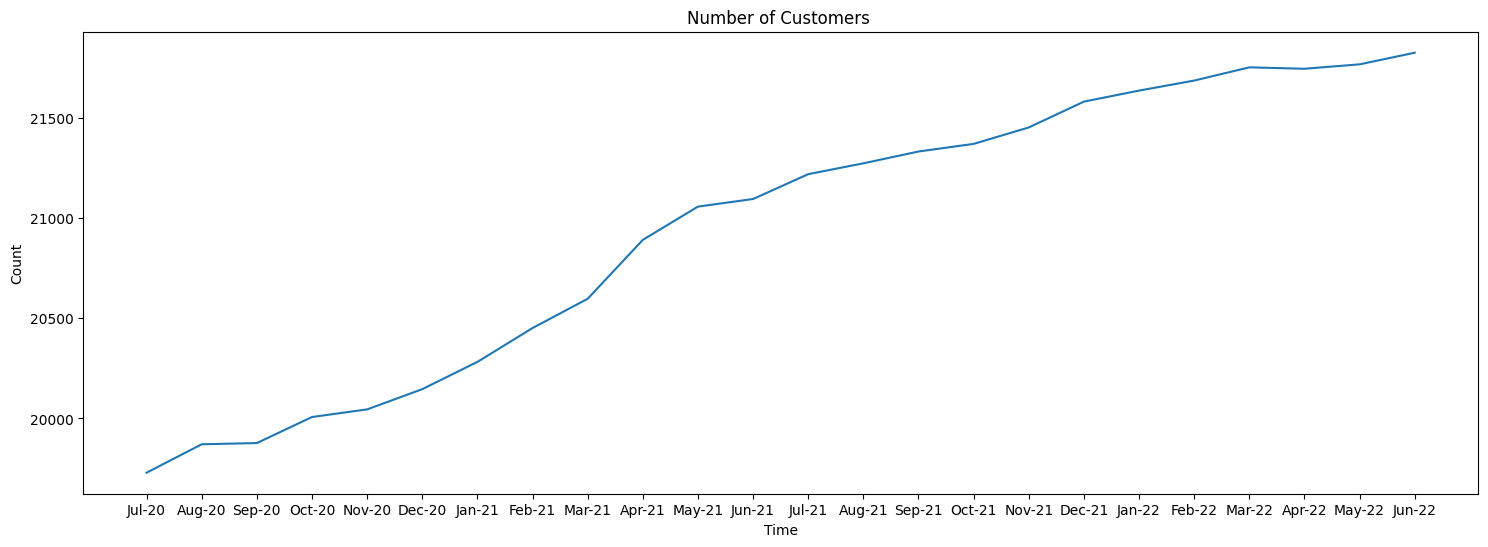

In [203]:
plt.figure(figsize=(18, 6))  # Adjust the figure size as needed

plt.plot(list(members.keys()), list(members.values()))
plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Number of Customers ')
#plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees

plt.show()

In [204]:
members_OUT_service = data[data['current_month_churn'] == True].groupby(['year','month','time']).size()
members_OUT_service

year  month  time  
2020  7      Jul-20    233
      8      Aug-20     75
      9      Sep-20    270
      10     Oct-20    162
      11     Nov-20    282
      12     Dec-20    230
2021  1      Jan-21    244
      2      Feb-21    217
      3      Mar-21    170
      4      Apr-21    179
      5      May-21    216
      6      Jun-21    259
      7      Jul-21    196
      8      Aug-21    209
      9      Sep-21    257
      10     Oct-21    234
      11     Nov-21    273
      12     Dec-21    215
2022  1      Jan-22    279
      2      Feb-22    239
      3      Mar-22    256
      4      Apr-22    286
      5      May-22    272
      6      Jun-22    249
dtype: int64

In [205]:
non_members = dict(zip(members_OUT_service.reset_index()['time'].tolist(), members_OUT_service))#The Less the better

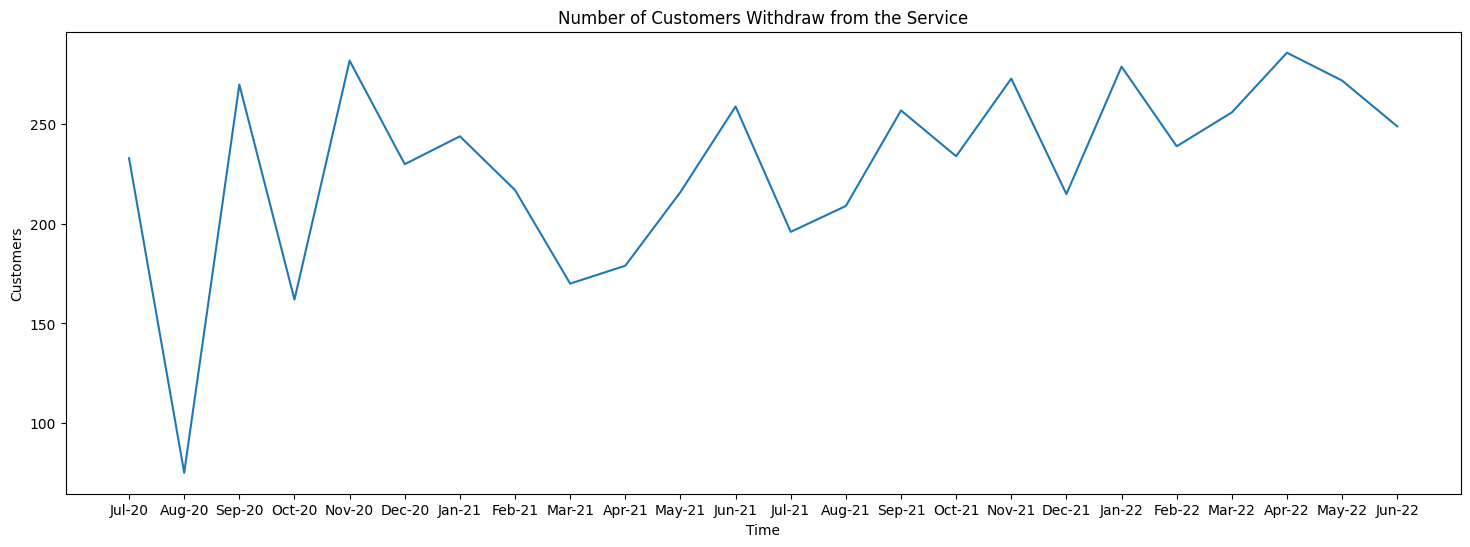

In [206]:
plt.figure(figsize=(18, 6))  # Adjust the figure size as needed

plt.plot(list(non_members.keys()), list(non_members.values()))
plt.xlabel('Time')
plt.ylabel('Customers')
plt.title('Number of Customers Withdraw from the Service')
#plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees

plt.show()

In [216]:
pd.DataFrame(non_members.values(),).describe()

,0
count,24.000000
mean,229.250000
std,48.178337
min,75.000000
25%,213.500000
50%,236.500000
75%,261.750000
max,286.000000


In [217]:
pd.DataFrame(members.values()).describe()

,0
count,24.000000
mean,20945.250000
std,718.880848
min,19729.000000
25%,20248.000000
50%,21157.000000
75%,21594.750000
max,21825.000000


In [235]:
monthly = pd.DataFrame({'members': members, 'non_members': non_members})
monthly['total_members'] = monthly['members'] + monthly['non_members']
monthly

,members,non_members,total_members
Jul-20,19729,233,19962
Aug-20,19871,75,19946
Sep-20,19877,270,20147
Oct-20,20007,162,20169
Nov-20,20045,282,20327
Dec-20,20146,230,20376
Jan-21,20282,244,20526
Feb-21,20451,217,20668
Mar-21,20597,170,20767
Apr-21,20891,179,21070


### 4.1 Monthly Customer Churn Rate(MCCR)

In [252]:
monthly['MCCR'] = monthly['non_members']/monthly['total_members']

In [253]:
monthly

,members,non_members,total_members,MCCR
Jul-20,19729,233,19962,0.011672
Aug-20,19871,75,19946,0.003760
Sep-20,19877,270,20147,0.013401
Oct-20,20007,162,20169,0.008032
Nov-20,20045,282,20327,0.013873
Dec-20,20146,230,20376,0.011288
Jan-21,20282,244,20526,0.011887
Feb-21,20451,217,20668,0.010499
Mar-21,20597,170,20767,0.008186
Apr-21,20891,179,21070,0.008495


### 4.2 Overall Customer Churn Rate = 1 - (1 - Avg MCCR)^N

In [257]:
OCCR = 1 - (1 - monthly['MCCR'].mean())**24 
round(OCCR*100,1)

22.9

### 4.3 Monthly Gross Revenue Churn (MGRC) = Previous Month Revenue - Current Month Revenue from exisitng customers

In [270]:
pd.options.display.float_format = '{:.2f}'.format
MGRC = data[data['current_month_churn'] == False].groupby(['year','month','time'])['bill_amount'].sum()
MGRC = pd.DataFrame(MGRC)
MGRC

bill_amount
year month time               
2020 7     Jul-20  10091137.50
     8     Aug-20  10205598.83
     9     Sep-20  10439246.39
     10    Oct-20  10490132.87
     11    Nov-20  10565418.80
     12    Dec-20  10727367.80
2021 1     Jan-21  10839676.61
     2     Feb-21  11114033.85
     3     Mar-21  11293605.75
     4     Apr-21  11436565.30
     5     May-21  11537012.95
     6     Jun-21  11526150.68
     7     Jul-21  11645304.44
     8     Aug-21  11522488.89
     9     Sep-21  12051223.93
     10    Oct-21  12737057.31
     11    Nov-21  12289656.40
     12    Dec-21  13081258.85
2022 1     Jan-22  13991160.16
     2     Feb-22  14331930.88
     3     Mar-22  15012676.20
     4     Apr-22  14768460.57
     5     May-22  14894303.17
     6     Jun-22  16111149.03

In [277]:
diff = round(MGRC['bill_amount'] - MGRC['bill_amount'].shift(1),2)
diff

year  month  time  
2020  7      Jul-20          NaN
      8      Aug-20    114461.32
      9      Sep-20    233647.56
      10     Oct-20     50886.48
      11     Nov-20     75285.93
      12     Dec-20    161949.00
2021  1      Jan-21    112308.80
      2      Feb-21    274357.24
      3      Mar-21    179571.90
      4      Apr-21    142959.55
      5      May-21    100447.65
      6      Jun-21    -10862.27
      7      Jul-21    119153.76
      8      Aug-21   -122815.56
      9      Sep-21    528735.04
      10     Oct-21    685833.38
      11     Nov-21   -447400.91
      12     Dec-21    791602.45
2022  1      Jan-22    909901.31
      2      Feb-22    340770.71
      3      Mar-22    680745.32
      4      Apr-22   -244215.63
      5      May-22    125842.60
      6      Jun-22   1216845.86
Name: bill_amount, dtype: float64

In [278]:
diff_line = dict(zip(diff.reset_index()['time'].tolist(), diff))#The Less the better

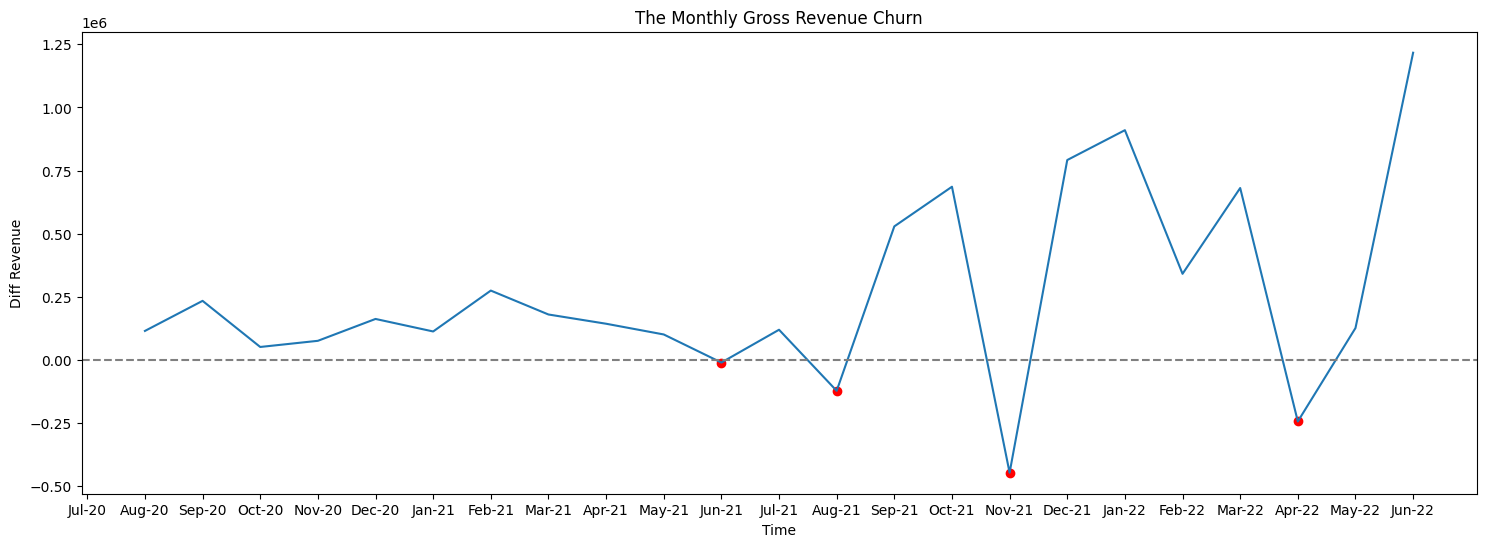

In [284]:
plt.figure(figsize=(18, 6))  # Adjust the figure size as needed

plt.plot(list(diff_line.keys()), list(diff_line.values()))
plt.xlabel('Time')
plt.ylabel('Diff Revenue')
plt.title('The Monthly Gross Revenue Churn')
#plt.xticks(rotation=90)  # Rotate x-axis labels by 90 degrees

for key, value in diff_line.items():
    if value < 0:
        plt.scatter(key, value, color='red', marker='o')

plt.axhline(0, color='gray', linestyle='--')  # Add horizontal line at y=0
plt.show()

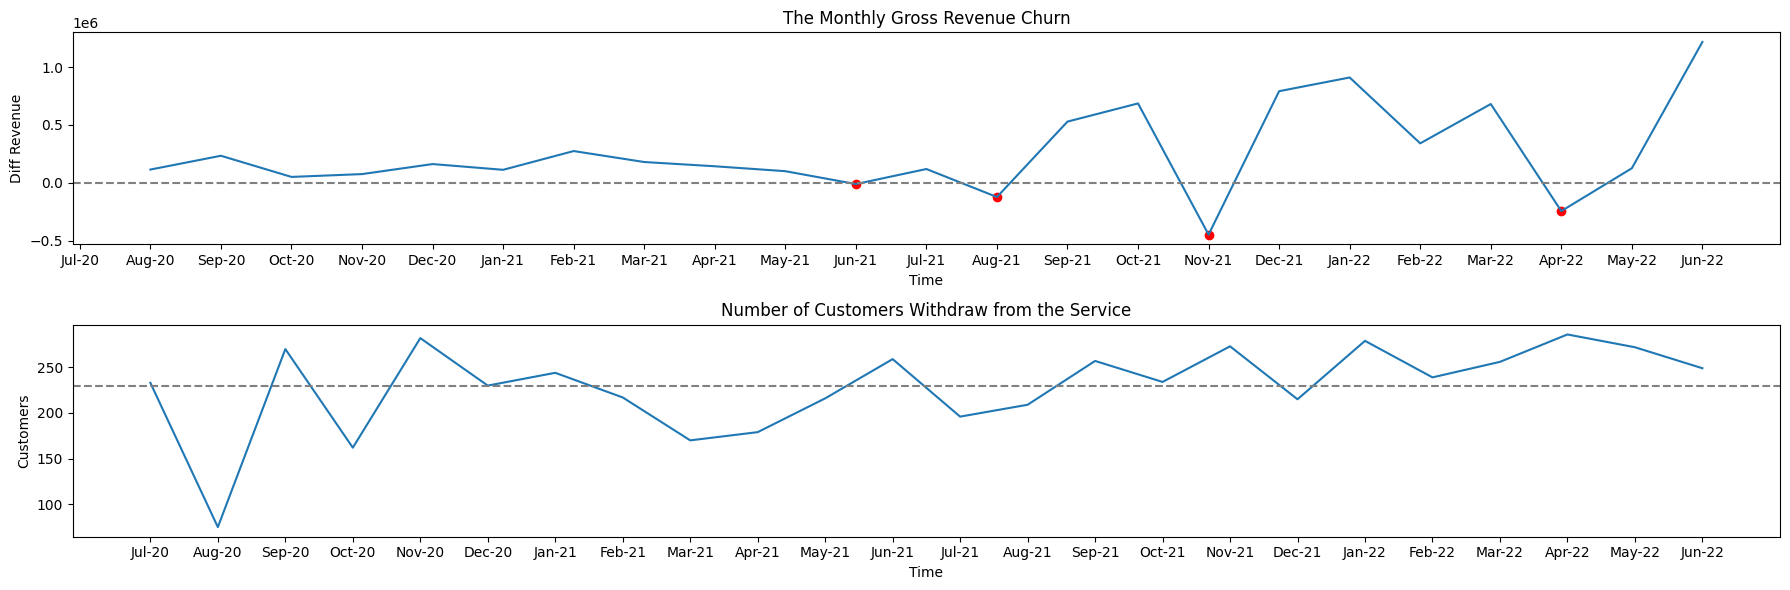

In [289]:
fig, axes = plt.subplots(2, 1, figsize=(18,6))

# Plot for the first subplot (axes[0])
axes[0].plot(list(diff_line.keys()), list(diff_line.values()))
axes[0].set_xlabel('Time')
axes[0].set_ylabel('Diff Revenue')
axes[0].set_title('The Monthly Gross Revenue Churn')

for key, value in diff_line.items():
    if value < 0:
        axes[0].scatter(key, value, color='red', marker='o')

axes[0].axhline(0, color='gray', linestyle='--')  # Add horizontal line at y=0

# Plot for the second subplot (axes[1])
axes[1].plot(list(non_members.keys()), list(non_members.values()))
axes[1].set_xlabel('Time')
axes[1].set_ylabel('Customers')
axes[1].set_title('Number of Customers Withdraw from the Service')

#Draw the mean line
axes[1].axhline(229.25, color='gray', linestyle='--')  # Add horizontal line at y=0


# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


### 5. Service Bandwidth used by the churned customers

In [324]:
data[data['current_month_churn'] == True]['bandwidth'].value_counts()

bandwidth
100M            2561
25M              962
1000M            879
30M              780
1000M (FTTO)     140
275M              76
BELOW 25M         43
250M (FTTO)       35
75M               26
Name: count, dtype: int64

<AxesSubplot: ylabel='bandwidth'>

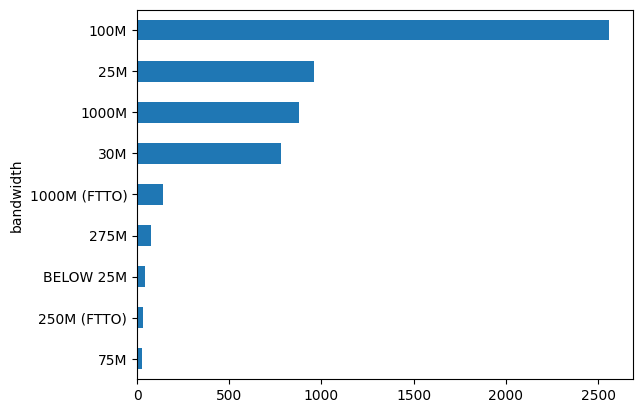

In [325]:
data[data['current_month_churn'] == True]['bandwidth'].value_counts().sort_values(ascending=True).plot.barh()

In [326]:
data.head()

,month,account_no,tenure,effective_start_date,effective_end_date,contract_month,bill_amount,bandwidth,term_reason_code,term_reason_description,complaint_cnt,with_phone_service,current_month_churn,is_new_customer_account,year,time
0,12,93910412CNZO000065449,72,12/28/2017,12/27/2019,24.00,862.29,275M,DSAT,Dissatisfied with service,0,False,True,0,2021,Dec-21
1,7,94074838CNZO000067822,49,6/24/2018,6/23/2020,24.00,6433.83,25M,DSAT,Dissatisfied with service,0,True,True,0,2020,Jul-20
2,7,73069668CNZO000011157,160,7/1/2018,6/30/2020,24.00,699.66,25M,DSAT,Dissatisfied with service,0,False,True,0,2020,Jul-20
3,9,93856268CPRL000077652,25,9/3/2018,8/2/2020,23.00,2930.24,25M,DSAT,Dissatisfied with service,0,True,True,0,2020,Sep-20
4,8,76820802CNZO000026425,119,8/22/2018,8/21/2020,24.00,418.86,1000M,DSAT,Dissatisfied with service,1,False,True,0,2020,Aug-20


### 6. When will the customers churn?

In [329]:
data.head()

,month,account_no,tenure,effective_start_date,effective_end_date,contract_month,bill_amount,bandwidth,term_reason_code,term_reason_description,complaint_cnt,with_phone_service,current_month_churn,is_new_customer_account,year,time
0,12,93910412CNZO000065449,72,12/28/2017,12/27/2019,24.00,862.29,275M,DSAT,Dissatisfied with service,0,False,True,0,2021,Dec-21
1,7,94074838CNZO000067822,49,6/24/2018,6/23/2020,24.00,6433.83,25M,DSAT,Dissatisfied with service,0,True,True,0,2020,Jul-20
2,7,73069668CNZO000011157,160,7/1/2018,6/30/2020,24.00,699.66,25M,DSAT,Dissatisfied with service,0,False,True,0,2020,Jul-20
3,9,93856268CPRL000077652,25,9/3/2018,8/2/2020,23.00,2930.24,25M,DSAT,Dissatisfied with service,0,True,True,0,2020,Sep-20
4,8,76820802CNZO000026425,119,8/22/2018,8/21/2020,24.00,418.86,1000M,DSAT,Dissatisfied with service,1,False,True,0,2020,Aug-20


In [330]:
data['contract_month'] = data['contract_month'].astype(int)

In [331]:
data.head()

,month,account_no,tenure,effective_start_date,effective_end_date,contract_month,bill_amount,bandwidth,term_reason_code,term_reason_description,complaint_cnt,with_phone_service,current_month_churn,is_new_customer_account,year,time
0,12,93910412CNZO000065449,72,12/28/2017,12/27/2019,24,862.29,275M,DSAT,Dissatisfied with service,0,False,True,0,2021,Dec-21
1,7,94074838CNZO000067822,49,6/24/2018,6/23/2020,24,6433.83,25M,DSAT,Dissatisfied with service,0,True,True,0,2020,Jul-20
2,7,73069668CNZO000011157,160,7/1/2018,6/30/2020,24,699.66,25M,DSAT,Dissatisfied with service,0,False,True,0,2020,Jul-20
3,9,93856268CPRL000077652,25,9/3/2018,8/2/2020,23,2930.24,25M,DSAT,Dissatisfied with service,0,True,True,0,2020,Sep-20
4,8,76820802CNZO000026425,119,8/22/2018,8/21/2020,24,418.86,1000M,DSAT,Dissatisfied with service,1,False,True,0,2020,Aug-20


In [338]:
churn = data[data['current_month_churn'] == True]
churn

,month,account_no,tenure,effective_start_date,effective_end_date,contract_month,bill_amount,bandwidth,term_reason_code,term_reason_description,complaint_cnt,with_phone_service,current_month_churn,is_new_customer_account,year,time
0,12,93910412CNZO000065449,72,12/28/2017,12/27/2019,24,862.29,275M,DSAT,Dissatisfied with service,0,False,True,0,2021,Dec-21
1,7,94074838CNZO000067822,49,6/24/2018,6/23/2020,24,6433.83,25M,DSAT,Dissatisfied with service,0,True,True,0,2020,Jul-20
2,7,73069668CNZO000011157,160,7/1/2018,6/30/2020,24,699.66,25M,DSAT,Dissatisfied with service,0,False,True,0,2020,Jul-20
3,9,93856268CPRL000077652,25,9/3/2018,8/2/2020,23,2930.24,25M,DSAT,Dissatisfied with service,0,True,True,0,2020,Sep-20
4,8,76820802CNZO000026425,119,8/22/2018,8/21/2020,24,418.86,1000M,DSAT,Dissatisfied with service,1,False,True,0,2020,Aug-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5518,2,92791722CNZO000059005,95,2/1/2020,1/31/2022,24,2632.50,25M,LSCV,Low speed coverage,0,False,True,0,2022,Feb-22
5519,5,94548559CNZO000074790,51,2/24/2020,2/23/2022,24,270.89,25M,LSCV,Low speed coverage,1,False,True,0,2022,May-22
5520,3,90969791CNZO000039942,120,3/1/2020,2/28/2022,24,699.66,25M,LSCV,Low speed coverage,0,True,True,0,2022,Mar-22
5521,6,94976453CNZO000081365,36,6/30/2019,6/29/2022,36,482.94,25M,LSCV,Low speed coverage,0,False,True,0,2022,Jun-22


In [351]:
churn[churn['tenure'] < churn['contract_month']].head()

,month,account_no,tenure,effective_start_date,effective_end_date,contract_month,bill_amount,bandwidth,term_reason_code,term_reason_description,complaint_cnt,with_phone_service,current_month_churn,is_new_customer_account,year,time
13,10,90213760CPRL000092215,4,7/5/2021,1/5/2022,6,173.16,30M,DSAT,Dissatisfied with service,0,True,True,0,2021,Oct-21
14,12,95328134CNZO000085182,11,2/10/2020,2/9/2022,24,273.78,100M,DSAT,Dissatisfied with service,0,False,True,0,2020,Dec-20
17,10,95593554CNZO000088128,1,9/23/2020,9/22/2022,24,0.00,100M,DSAT,Dissatisfied with service,0,False,True,0,2020,Oct-20
18,8,95801130CNZO000090633,5,3/19/2021,3/18/2023,24,210.60,100M,DSAT,Dissatisfied with service,0,False,True,0,2021,Aug-21
19,8,95801130CNZO000090634,5,3/19/2021,3/18/2023,24,210.60,100M,DSAT,Dissatisfied with service,0,False,True,0,2021,Aug-21


In [383]:
#Out Contract
churn[churn['tenure'] > churn['contract_month']].groupby(['year','month','time'])['is_new_customer_account'].count()

year  month  time  
2020  7      Jul-20    180
      8      Aug-20     67
      9      Sep-20    207
      10     Oct-20    138
      11     Nov-20    229
      12     Dec-20    172
2021  1      Jan-21    177
      2      Feb-21    170
      3      Mar-21    130
      4      Apr-21    134
      5      May-21    171
      6      Jun-21    200
      7      Jul-21    139
      8      Aug-21    154
      9      Sep-21    179
      10     Oct-21    170
      11     Nov-21    208
      12     Dec-21    160
2022  1      Jan-22    197
      2      Feb-22    194
      3      Mar-22    205
      4      Apr-22    228
      5      May-22    207
      6      Jun-22    188
Name: is_new_customer_account, dtype: int64

In [366]:
#In Contract
churn[churn['tenure'] < churn['contract_month']].groupby(['year','month','time'])['is_new_customer_account'].count()

year  month  time  
2020  7      Jul-20    53
      8      Aug-20     8
      9      Sep-20    63
      10     Oct-20    24
      11     Nov-20    53
      12     Dec-20    58
2021  1      Jan-21    67
      2      Feb-21    47
      3      Mar-21    40
      4      Apr-21    45
      5      May-21    45
      6      Jun-21    59
      7      Jul-21    57
      8      Aug-21    55
      9      Sep-21    78
      10     Oct-21    64
      11     Nov-21    65
      12     Dec-21    55
2022  1      Jan-22    82
      2      Feb-22    45
      3      Mar-22    51
      4      Apr-22    58
      5      May-22    65
      6      Jun-22    61
Name: is_new_customer_account, dtype: int64

In [387]:
churn_time = pd.DataFrame({'In Contract': churn[churn['tenure'] <= churn['contract_month']].groupby(['year','month','time'])['is_new_customer_account'].count(), 'Out Contract': churn[churn['tenure'] > churn['contract_month']].groupby(['year','month','time'])['is_new_customer_account'].count()})

In [388]:
churn_time

In Contract  Out Contract
year month time                             
2020 7     Jul-20           53           180
     8     Aug-20            8            67
     9     Sep-20           63           207
     10    Oct-20           24           138
     11    Nov-20           53           229
     12    Dec-20           58           172
2021 1     Jan-21           67           177
     2     Feb-21           47           170
     3     Mar-21           40           130
     4     Apr-21           45           134
     5     May-21           45           171
     6     Jun-21           59           200
     7     Jul-21           57           139
     8     Aug-21           55           154
     9     Sep-21           78           179
     10    Oct-21           64           170
     11    Nov-21           65           208
     12    Dec-21           55           160
2022 1     Jan-22           82           197
     2     Feb-22           45           194
     3     Mar-22           51           205
     4     Apr-22           58           228
     5     May-22           65           207
     6     Jun-22           61           188

In [389]:
print(churn_time['In Contract'].tolist())
print(churn_time['Out Contract'].tolist())

[53, 8, 63, 24, 53, 58, 67, 47, 40, 45, 45, 59, 57, 55, 78, 64, 65, 55, 82, 45, 51, 58, 65, 61]
[180, 67, 207, 138, 229, 172, 177, 170, 130, 134, 171, 200, 139, 154, 179, 170, 208, 160, 197, 194, 205, 228, 207, 188]


In [390]:
print(churn_time.index.get_level_values('time').tolist())

['Jul-20', 'Aug-20', 'Sep-20', 'Oct-20', 'Nov-20', 'Dec-20', 'Jan-21', 'Feb-21', 'Mar-21', 'Apr-21', 'May-21', 'Jun-21', 'Jul-21', 'Aug-21', 'Sep-21', 'Oct-21', 'Nov-21', 'Dec-21', 'Jan-22', 'Feb-22', 'Mar-22', 'Apr-22', 'May-22', 'Jun-22']


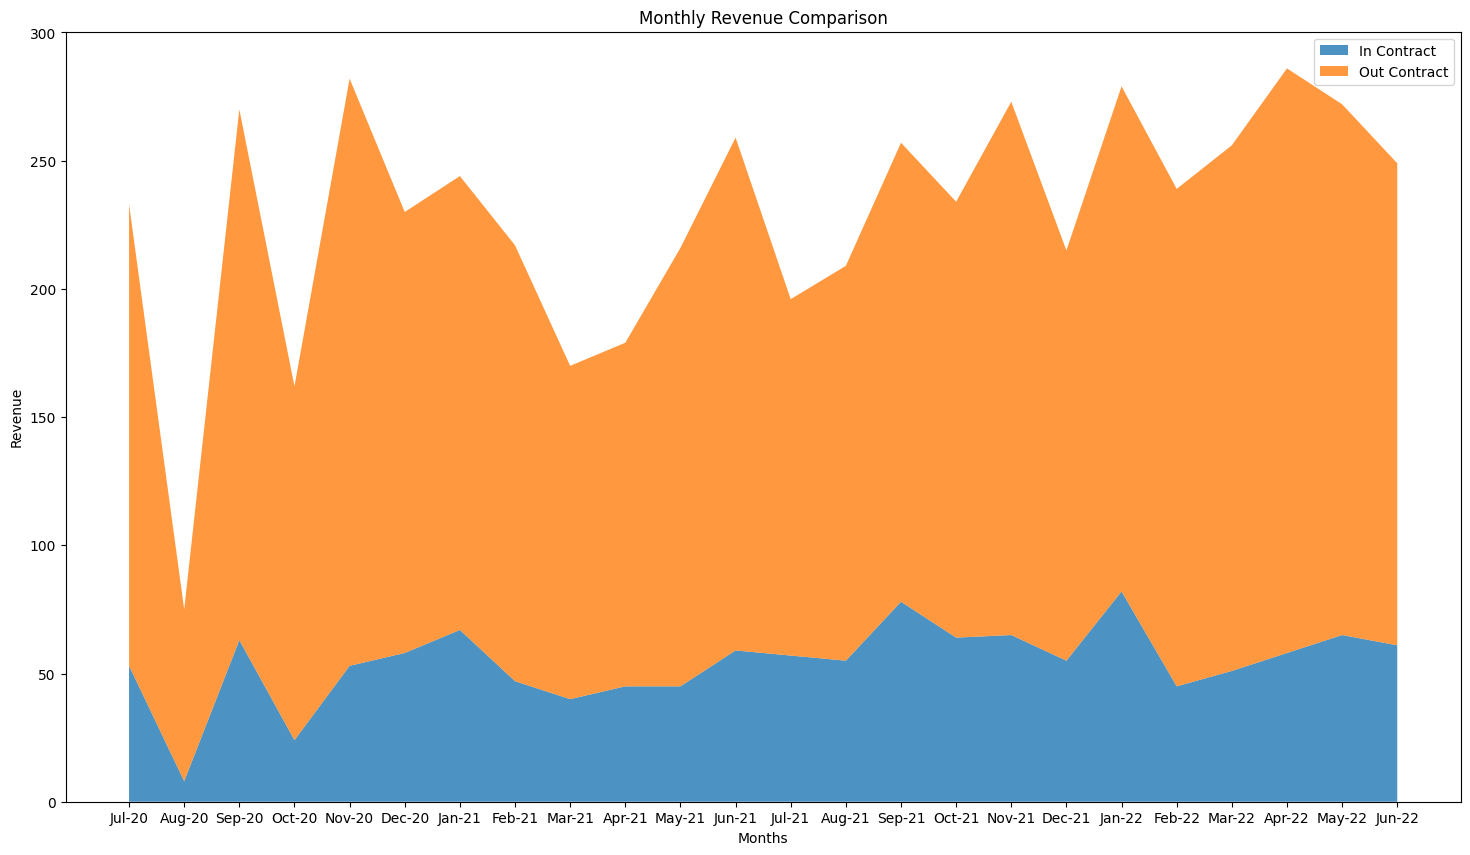

In [391]:
# Sample data
time_month = churn_time.index.get_level_values('time').tolist()
in_contract  = churn_time['In Contract'].tolist()
out_contract = churn_time['Out Contract'].tolist()

# Create the area chart
plt.figure(figsize=(18, 10))
plt.stackplot(time_month, in_contract, out_contract, labels=['In Contract', 'Out Contract'], alpha=0.8)

# Set labels and title
plt.xlabel('Months')
plt.ylabel('Revenue')
plt.title('Monthly Revenue Comparison')

# Display the legend
plt.legend()

# Show the chart
plt.show()